## KNN- K Nearest Neighbors 
 K means is unrelated to KNN.

* It simply assings a label to new data based on the **distance** between the old data and new data.

* Tie considerations and options:
    * Always choose an odd K
    * In case of tie,simply reduce K by 1 until tie is broken.
    * Randomly break tie.
    * Choose nearest class point.
----
* We want a K value that **minimizes** error:
    * Error=1-Accuracy
----
* Two methods:
    * Elbow method.
    * Cross validate a grid search of multiple K values and choose K that results in lowest error or highest accuracy.
----
* KNN Algorithim
    * Choose K value
    * Sort feature vectors(N dimensional space) by distance metric.
    * Choose class based on K nearest feature vectors.
----
* KNN Considerations:
    * Distance Metrics
        * Many ways to measure distance:
            * Minkowski
            * Euclidean
            * Manhattan
            * Chebyshev
    * Scaling for Distance
        * Scaling is necessary for KNN   
----
* While the KNN Algorithm is relatively simple,keep in mind the following considerations:
    * Choosing the optimal K value.
    * Scaling features.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("./gene_expression.csv")

In [4]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

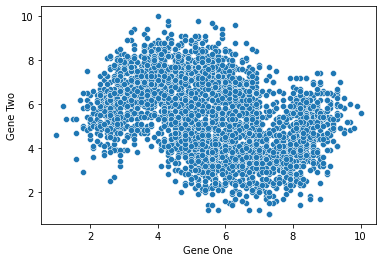

In [5]:
sns.scatterplot(data=df,x="Gene One",y="Gene Two")

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

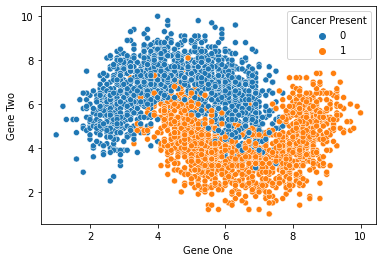

In [6]:
sns.scatterplot(data=df,x="Gene One",y="Gene Two",hue="Cancer Present")

In [7]:
len(df)

3000

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

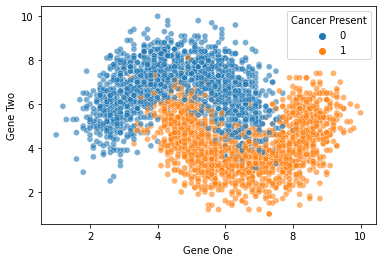

In [8]:
sns.scatterplot(data=df,x="Gene One",y="Gene Two",hue="Cancer Present",alpha=0.6)

(4.0, 8.0)

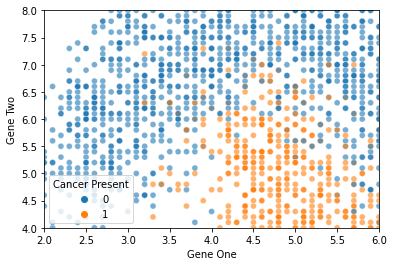

In [9]:
sns.scatterplot(data=df,x="Gene One",y="Gene Two",hue="Cancer Present",alpha=0.6)
plt.xlim(2,6)
plt.ylim(4,8)

(4.0, 8.0)

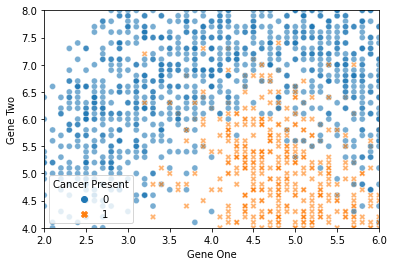

In [10]:
sns.scatterplot(data=df,x="Gene One",y="Gene Two",hue="Cancer Present",alpha=0.6,style="Cancer Present" )
plt.xlim(2,6)
plt.ylim(4,8)

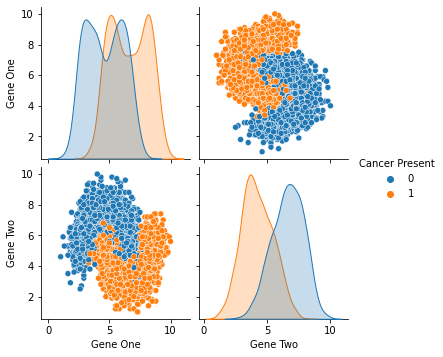

In [11]:
sns.pairplot(data=df,hue="Cancer Present")

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
X=df.drop("Cancer Present",axis=1)

In [15]:
y=df["Cancer Present"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
scaler=StandardScaler()

In [18]:
scaled_X_train=scaler.fit_transform(X_train)

In [19]:
scaled_X_test=scaler.transform(X_test)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn_model=KNeighborsClassifier(n_neighbors=1)

In [22]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [23]:
y_pred=knn_model.predict(scaled_X_test)

In [24]:
from sklearn.metrics import confusion_matrix,classification_report

In [25]:
confusion_matrix(y_test,y_pred)

array([[420,  50],
       [ 47, 383]])

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       470
           1       0.88      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



In [27]:
df["Cancer Present"].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
1-accuracy_score(y_test,y_pred)

0.10777777777777775

### Choosing K

In [30]:
test_error_rates=[]

for k in range(1,30):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)

    y_pred_test=knn_model.predict(scaled_X_test)

    test_error=1- accuracy_score(y_test,y_pred_test)

    test_error_rates.append(test_error)
    

In [31]:
test_error_rates

[0.10777777777777775,
 0.09999999999999998,
 0.07444444444444442,
 0.07666666666666666,
 0.07222222222222219,
 0.06444444444444442,
 0.06444444444444442,
 0.06222222222222218,
 0.06000000000000005,
 0.06222222222222218,
 0.06222222222222218,
 0.06000000000000005,
 0.06222222222222218,
 0.06222222222222218,
 0.06000000000000005,
 0.05666666666666664,
 0.05555555555555558,
 0.05555555555555558,
 0.053333333333333344,
 0.053333333333333344,
 0.054444444444444406,
 0.05111111111111111,
 0.054444444444444406,
 0.054444444444444406,
 0.05666666666666664,
 0.05666666666666664,
 0.05555555555555558,
 0.05777777777777782,
 0.05777777777777782]

Text(0.5, 0, 'K Neighbors')

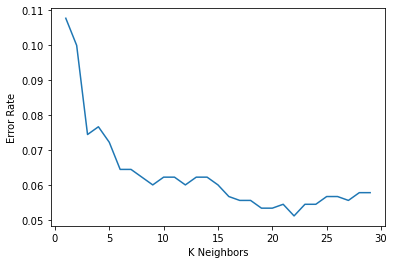

In [32]:
plt.plot(range(1,30),test_error_rates)
plt.ylabel("Error Rate")
plt.xlabel("K Neighbors")

In [33]:
scaler=StandardScaler()

In [35]:
knn=KNeighborsClassifier()

In [36]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [37]:
operations=[("scaler",scaler),("knn",knn)]

In [38]:
from sklearn.pipeline import Pipeline

In [39]:
pipe=Pipeline(operations)

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
k_values=list(range(1,20))

In [42]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [43]:
param_grid={"knn__n_neighbors":k_values}

In [44]:
full_cv_classifier=GridSearchCV(pipe,param_grid,cv=5,
                                scoring="accuracy")

In [45]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [48]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=14))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=14),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 14,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [50]:
full_pred=full_cv_classifier.predict(X_test)

In [51]:
print(classification_report(y_test,full_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.93       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [52]:
new_patient=[[3.8,6.4]]

In [53]:
full_cv_classifier.predict(new_patient)

array([0])

In [54]:
full_cv_classifier.predict_proba(new_patient)

array([[1., 0.]])